In [1]:
import scanpy as sc
import os

In [2]:
data_dir = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/Integration/adata"
adata = sc.read_h5ad(os.path.join(data_dir,"adata_scvi.h5ad"))

In [3]:
adata

AnnData object with n_obs × n_vars = 152319 × 18088
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'complexity', 'doublet_scores', 'predicted_doublets', 'n_genes', 'n_counts', 'celltypist_labels_Immune_All_High', 'celltypist_scores_Immune_All_High', 'celltypist_labels_Cells_Adult_Breast', 'celltypist_scores_Cells_Adult_Breast', 'batch', 'subtype', 'leiden'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'hvg', 'leiden', 'log1p', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_pca_MDE', 'X_scVI', 'X_scvi_MDE'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs["celltypist_labels_Immune_All_High_highconf"] = "unknown"
mask = adata.obs["celltypist_scores_Immune_All_High"] > 0.95
adata.obs.loc[mask, "celltypist_labels_Immune_All_High_highconf"] = adata.obs.loc[mask, "celltypist_labels_Immune_All_High"]

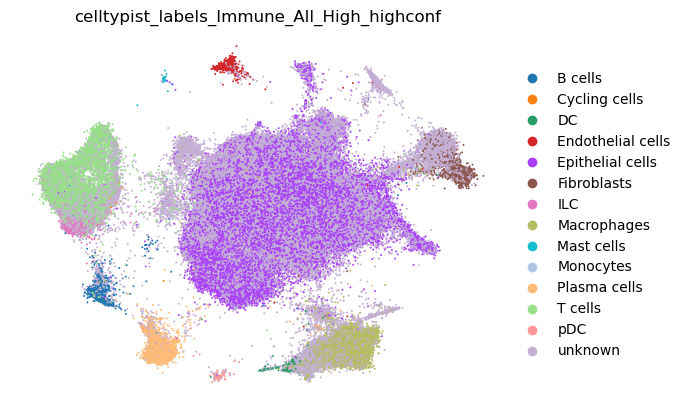

In [5]:
sc.pl.embedding(
    adata,
    basis="X_scvi_MDE",
    color=["celltypist_labels_Immune_All_High_highconf"],
    frameon=False,
    ncols=2,use_raw = False, cmap = "viridis", size = 8)

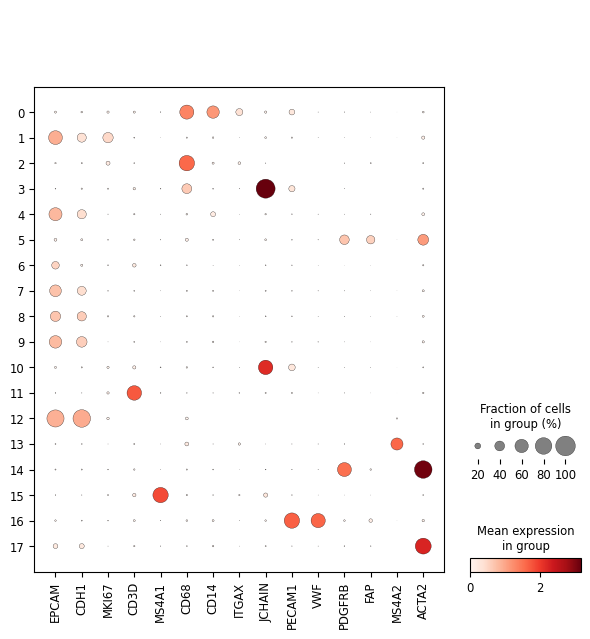

In [6]:
# "EPCAM","CDH1" epithelial
# "MKI67" proliferative
# "CD3D", T cells
# "MS4A1" B cells
# JCHAIN plasma cells
# "CD68","CD14", "ITGAX" macrophages
# "PECAM1","VWF" endothelial
# "PDGFRB","FAP" fibroblasts
# MS4A2 Mast/Basophiphs cells

general_markers  = ["EPCAM","CDH1", "MKI67", "CD3D", "MS4A1", "CD68","CD14", "ITGAX","JCHAIN", "PECAM1","VWF", "PDGFRB","FAP","MS4A2","ACTA2"]


sc.pl.dotplot(adata=adata, var_names=general_markers, groupby="leiden")

In [7]:
rename_dict = {"0": "Myeloid",
                "1": "Cycling cells",
               "2": "Myeloid",
               "3": "Plasma cells",
               "4": "Epithelial",
               "5": "Fibroblasts",
               "6": "Epithelial",
               "7": "Epithelial",
               "8": "Epithelial",
               "9": "Epithelial",
               "10": "Plasma cells",
               "11": "T cells",
               "12": "Epithelial",
               "13": "Mast cells",
               "14": "Fibroblasts",
               "15": "B cells", 
               "16": "Endothelial",
               "17": "unkown",
               }
adata.obs['GenAnno'] = adata.obs['leiden'].replace(rename_dict)

/tmp/ipykernel_380341/3797615510.py:20: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['GenAnno'] = adata.obs['leiden'].replace(rename_dict)


In [8]:
adata.obs.celltypist_labels_Immune_All_High_highconf.cat.categories

Index(['B cells', 'Cycling cells', 'DC', 'Endothelial cells',
       'Epithelial cells', 'Fibroblasts', 'ILC', 'Macrophages', 'Mast cells',
       'Monocytes', 'Plasma cells', 'T cells', 'pDC', 'unknown'],
      dtype='object')

In [9]:
adata.obs.GenAnno.unique

<bound method Series.unique of AAACCTGAGAAACCGC-1-PM0337-          Myeloid
AAACCTGAGACCCACC-1-PM0337-          Myeloid
AAACCTGCACCTGGTG-1-PM0337-     Plasma cells
AAACCTGCACTAGTAC-1-PM0337-       Epithelial
AAACCTGCAGGCGATA-1-PM0337-       Epithelial
                                  ...      
TTTGTCAAGTTAGGTA-1-MH0126-          T cells
TTTGTCACACGTGAGA-1-MH0126-          Myeloid
TTTGTCACATCGGAAG-1-MH0126-    Cycling cells
TTTGTCATCCCGACTT-1-MH0126-          T cells
TTTGTCATCCTGTACC-1-MH0126-       Epithelial
Name: GenAnno, Length: 152319, dtype: category
Categories (10, object): ['Myeloid', 'Cycling cells', 'Plasma cells', 'Epithelial', ..., 'Mast cells', 'B cells', 'Endothelial', 'unkown']>

In [10]:
mapping_dict = {
    "B cells": "B cells",
    "Cycling cells": "Cycling cells",
    "DC": "Myeloid",
    "Endothelial cells": "Endothelial",
    "Epithelial cells": "Epithelial",
    "ILC": "Myeloid",
    "T cells": "T cells",
    "Fibroblasts": "Fibroblasts",
    "Macrophages": "Myeloid",
    "Mast cells": "Mast cells",
    'Monocytes':"Myeloid", 
    'Plasma cells': "Plasma cells", 
    'pDC': "Myeloid", 
    'unknown':"unknown"
}

In [11]:
adata.obs["celltypist_mapped"] = adata.obs["celltypist_labels_Immune_All_High_highconf"].map(mapping_dict)

In [14]:
mask = (adata.obs["celltypist_mapped"] == (adata.obs["GenAnno"])) | (adata.obs['GenAnno'] == 'Cycling cells')

In [15]:
adata.obs['GenAnnoHighConf'] = adata[mask, :].obs.GenAnno

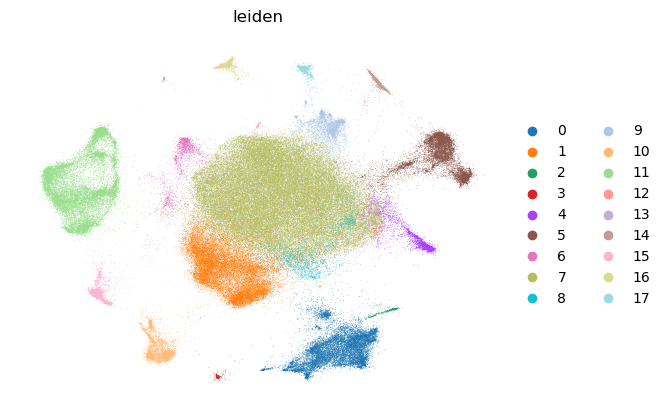

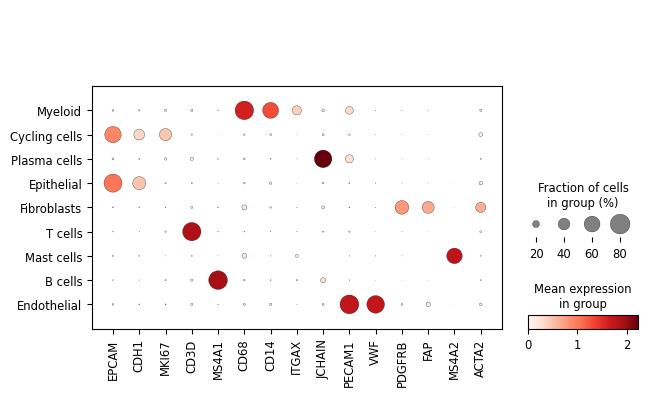

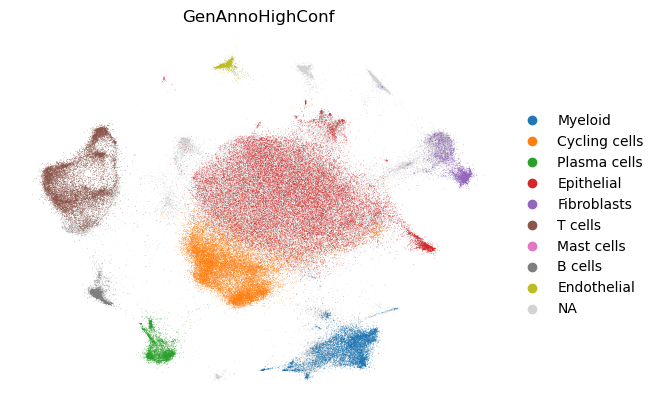

In [18]:
# Renombrar los valores en la columna deseada

sc.pl.embedding(
    adata,
    basis="X_scvi_MDE",
    color=["leiden"],
    frameon=False, 
    #legend_loc="on data",
    ncols=1,
)
sc.pl.dotplot(adata=adata, var_names=general_markers, groupby="GenAnnoHighConf")

sc.pl.embedding(
    adata,
    basis="X_scvi_MDE",
    color=["GenAnnoHighConf"],
    frameon=False, 
    #legend_loc="on data",
    ncols=1,
)



In [19]:

adata.write_h5ad(os.path.join(data_dir,"adata_GenAnnoHighConf.h5ad"))
